In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


In [3]:
# Load Titanic dataset
df = pd.read_csv('train.csv')  # Adjust the file name if needed


In [5]:
# Display first few rows of the dataset
df.head()

# Get information about the dataset (Data types, Non-null counts)
df.info()

# Basic statistical summary for numerical columns
df.describe()

# Count the unique values in each column
df['Survived'].value_counts()  # Example for a categorical column
df['Pclass'].value_counts()    # Another example for Pclass


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,count
Pclass,
3,491
1,216
2,184


1. .describe(), .info(), .value_counts()

info(): Most columns are complete, but Age has missing values.

describe(): Fare shows high variance; Age is mostly between 20–40.

value_counts(): Most passengers did not survive; majority were in 3rd class.



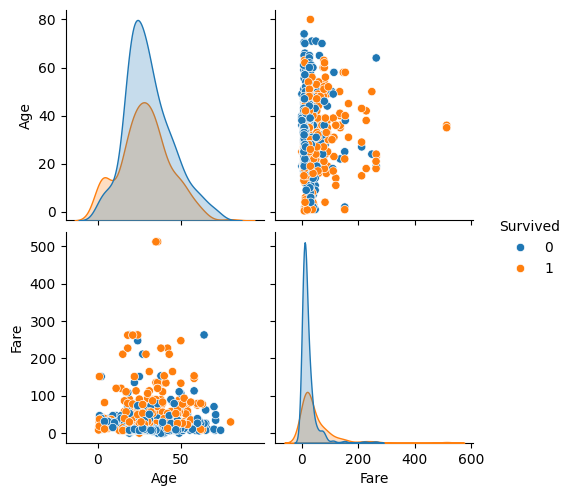

In [6]:
# Pairplot for Age, Fare, and Survived to explore relationships
sns.pairplot(df[['Age', 'Fare', 'Survived']], hue='Survived')
plt.show()


Pairplot: Survivors had generally lower age and higher fare.

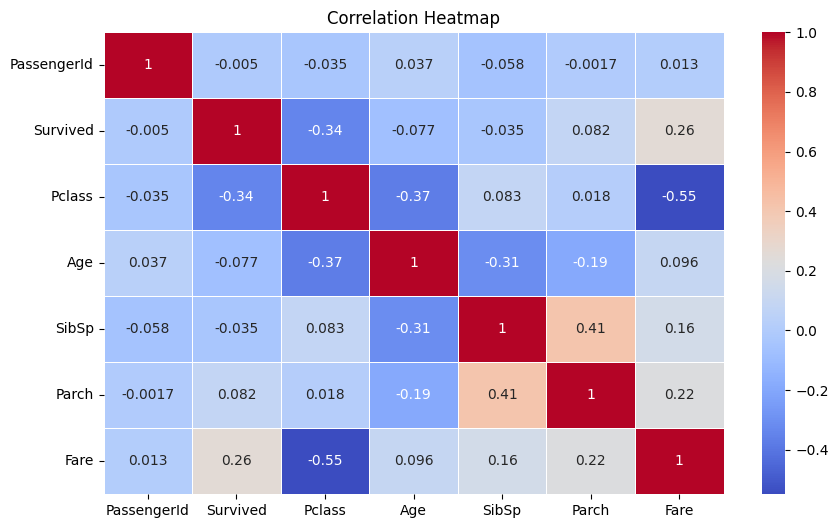

In [8]:
# Ensure only numerical columns are used for correlation
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Heatmap: Fare has moderate positive correlation with Survival; Pclass has a negative correlation.



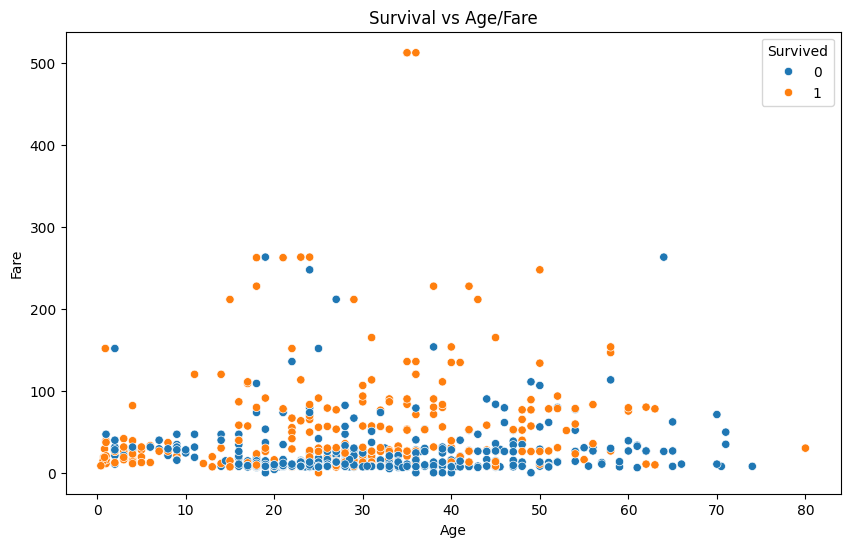

In [9]:
# Scatterplot to identify relationships between Age, Fare, and Survived
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Survival vs Age/Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


Scatterplot: Survivors cluster at higher fares and lower ages.

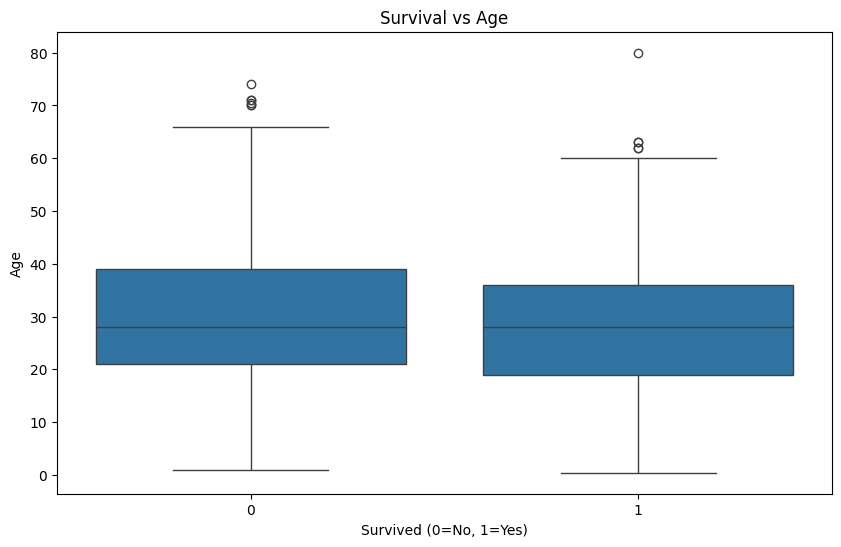

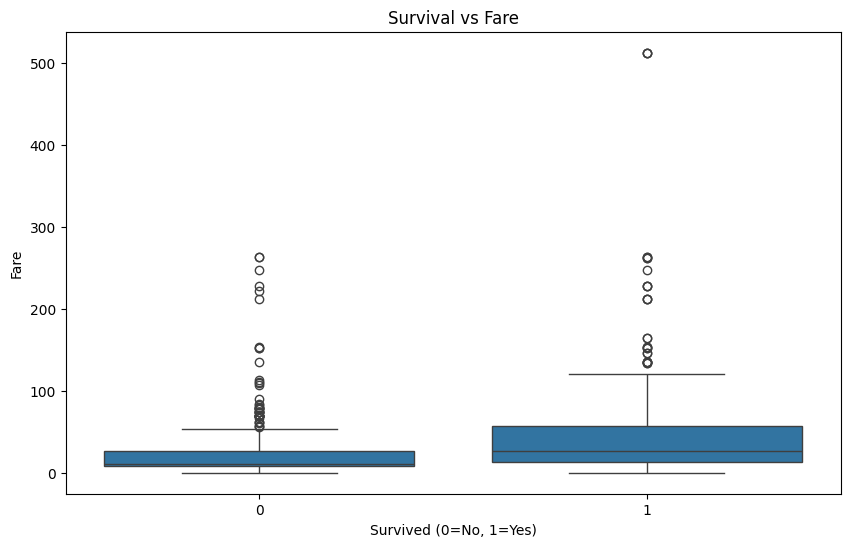

In [10]:
# Boxplot for Survival vs Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Survival vs Age')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Age')
plt.show()

# Boxplot for Survival vs Fare
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Survival vs Fare')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Fare')
plt.show()


Boxplot (Age): Survivors are mostly younger.

Boxplot (Fare): Survivors paid higher fares on average.



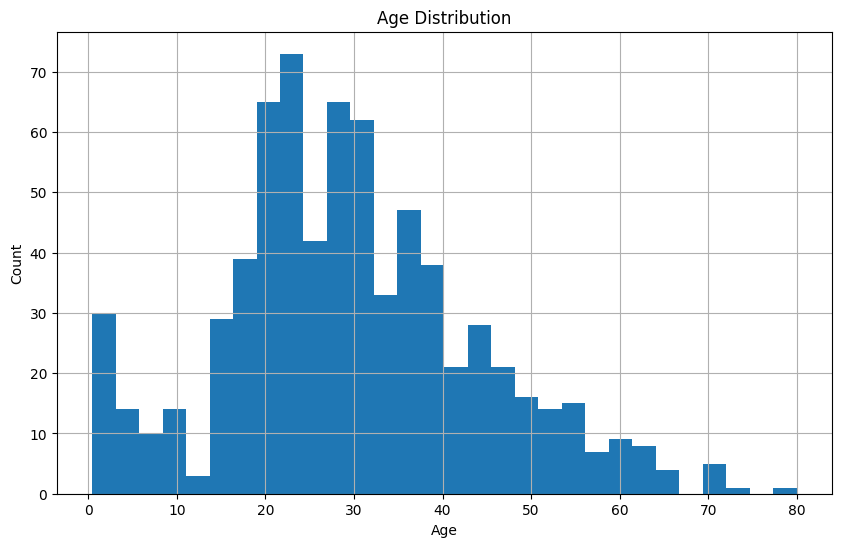

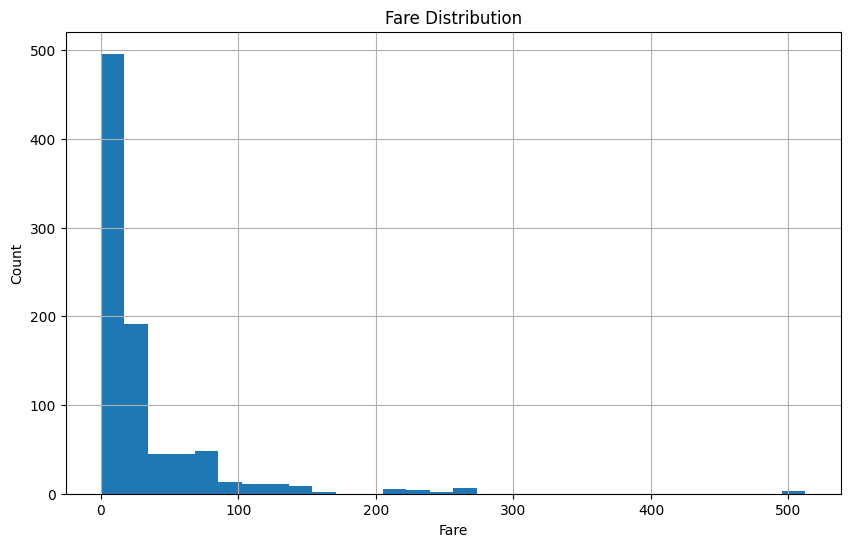

In [11]:
# Histogram for Age distribution
plt.figure(figsize=(10, 6))
df['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Histogram for Fare distribution
plt.figure(figsize=(10, 6))
df['Fare'].hist(bins=30)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()


Histogram (Age): Most passengers are aged 20–40.

Histogram (Fare): Many passengers paid low fares; some outliers exist.

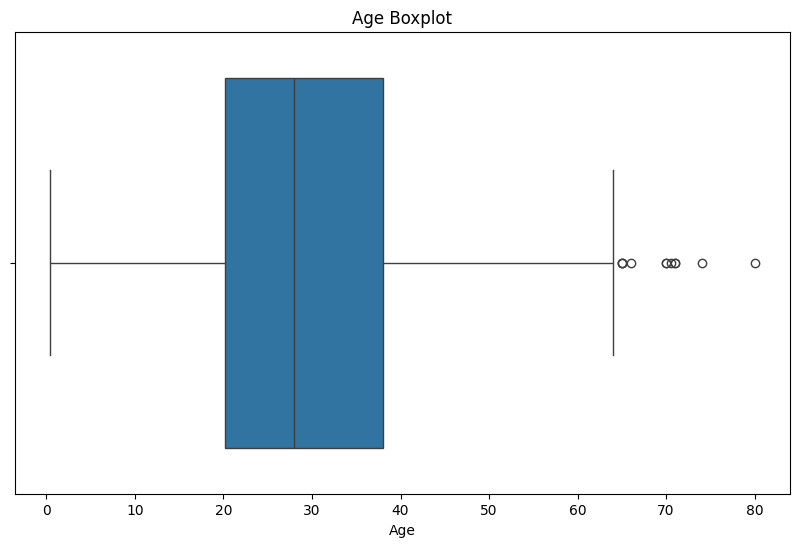

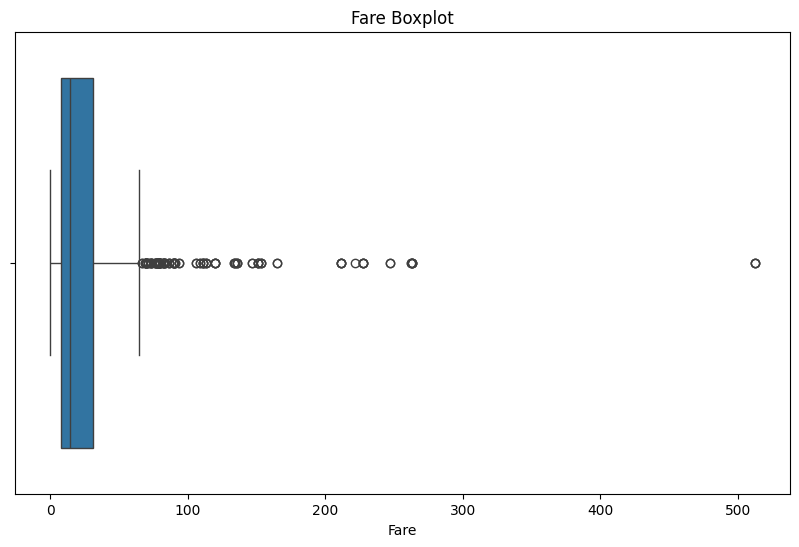

In [12]:
# Boxplot for Age
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Age Boxplot')
plt.xlabel('Age')
plt.show()

# Boxplot for Fare
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Fare'])
plt.title('Fare Boxplot')
plt.xlabel('Fare')
plt.show()


Boxplot (Age): Few older passengers; minor outliers.

Boxplot (Fare): Several high-fare outliers observed.



### Summary of Findings:

- Most passengers were in **3rd class** and the **majority did not survive**.
- **Survival rate was higher** for passengers who were:
  - In **1st or 2nd class**.
  - **Younger** in age.
  - Paid **higher fares**.
- **Age** and **Fare** had noticeable differences between survivors and non-survivors.
- Strong correlation seen between **Fare**, **Pclass**, and **Survival**.
- Outliers exist in **Fare**, indicating a few passengers paid very high amounts.
